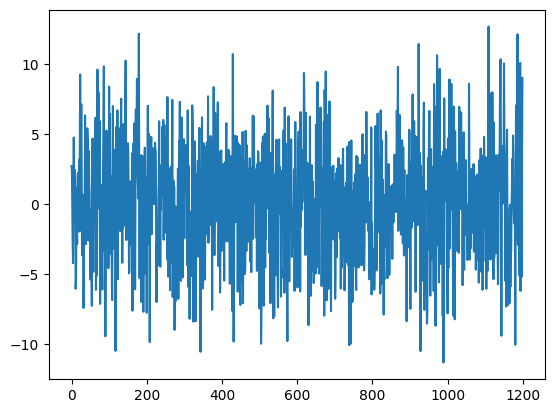

In [5]:
!export PYTHONPATH=/data/users2/jwardell1/undersampling-project/scripts/

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import detrend


def create_colored_noise(cov_mat, L, noise_size):
    assert cov_mat.shape == (53, 53), 'cov_mat should be 53 x 53 matrix'
    assert L.shape == (53, 53), 'L should be 53 x 53 matrix'
    mean = np.zeros(cov_mat.shape[0])
    white_noise = np.random.multivariate_normal(mean, np.eye(cov_mat.shape[0]), size=noise_size)
    colored_noise = white_noise @ L.T
    colored_noise = colored_noise.T
    #colored_noise = zscore(colored_noise, axis=1)
    #colored_noise = detrend(colored_noise, axis=1)
    return colored_noise



# Generate the colored noise
cov_mat = np.random.rand(53, 53)
L = np.random.rand(53, 53)
noise = create_colored_noise(cov_mat, L, 1200)
plt.plot(noise[0,:])


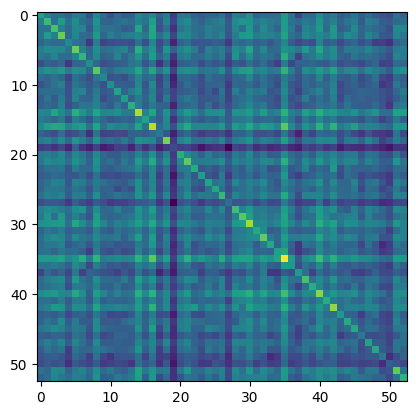

In [6]:
plt.imshow(noise @ noise.T)

/tmp/ipykernel_1322071/3107816015.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(np.corrcoef(sr1), cmap=plt.cm.get_cmap('seismic'), vmin=-1, vmax=1)


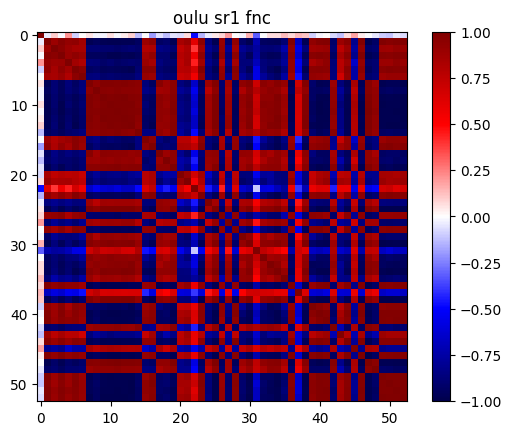

/tmp/ipykernel_1322071/3107816015.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(np.corrcoef(sr2), cmap=plt.cm.get_cmap('seismic'), vmin=-1, vmax=1)


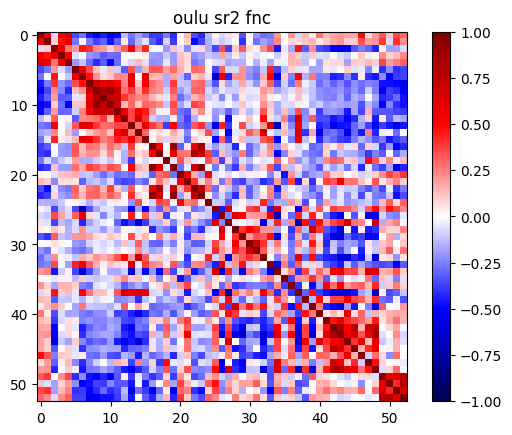

/tmp/ipykernel_1322071/3107816015.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(np.corrcoef(intmat), cmap=plt.cm.get_cmap('seismic'), vmin=-1, vmax=1)


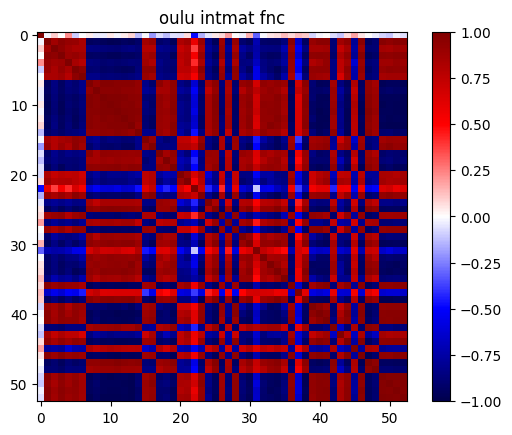

/tmp/ipykernel_1322071/3107816015.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(np.corrcoef(intmat) - np.corrcoef(sr1), cmap=plt.cm.get_cmap('seismic'), vmin=-1, vmax=1)


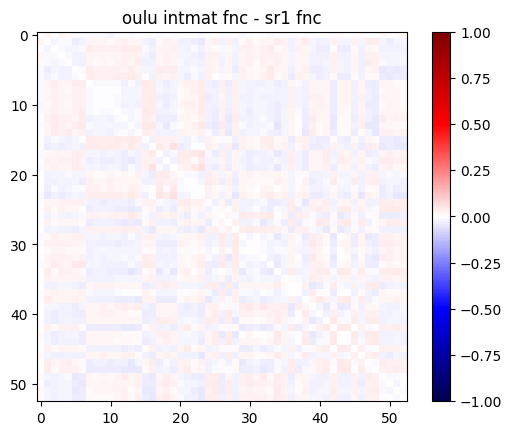

In [6]:
from scipy.io import loadmat
from scipy.signal import detrend
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np

sr1 = loadmat('/data/users2/jwardell1/nshor_docker/examples/oulu-project/OULU/20150210/processed/TCOutMax_20150210_TR100.mat')['TCMax'].T
sr1 = detrend(sr1, axis=1)
sr1 = zscore(sr1, axis=1)

sr2 = loadmat('/data/users2/jwardell1/nshor_docker/examples/oulu-project/OULU/20150210/processed/TCOutMax_20150210_TR2150.mat')['TCMax'].T
sr2 = detrend(sr2, axis=1)
sr2 = zscore(sr2, axis=1)

intmat = np.zeros((53, 2961*2))
intmat[:,::33] = sr2
intmat[:,::2] = sr1


plt.imshow(np.corrcoef(sr1), cmap=plt.cm.get_cmap('seismic'), vmin=-1, vmax=1)
plt.colorbar()
plt.title('oulu sr1 fnc')
plt.show()
plt.clf()

plt.imshow(np.corrcoef(sr2), cmap=plt.cm.get_cmap('seismic'), vmin=-1, vmax=1)
plt.colorbar()
plt.title('oulu sr2 fnc')
plt.show()
plt.clf()

plt.imshow(np.corrcoef(intmat), cmap=plt.cm.get_cmap('seismic'), vmin=-1, vmax=1)
plt.colorbar()
plt.title('oulu intmat fnc')
plt.show()

plt.imshow(np.corrcoef(intmat) - np.corrcoef(sr1), cmap=plt.cm.get_cmap('seismic'), vmin=-1, vmax=1)
plt.colorbar()
plt.title('oulu intmat fnc - sr1 fnc')
plt.show()